# 12. Machine learning techniques

In [2]:
import random as rd
rd.seed(0)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 12.1 Loading and exploring the dataset

First, we use pandas to load the dataset from a csv file.

In [5]:
raw_data = pd.read_csv('./titanic.csv')
raw_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Next, we can explore the dataset.

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
raw_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

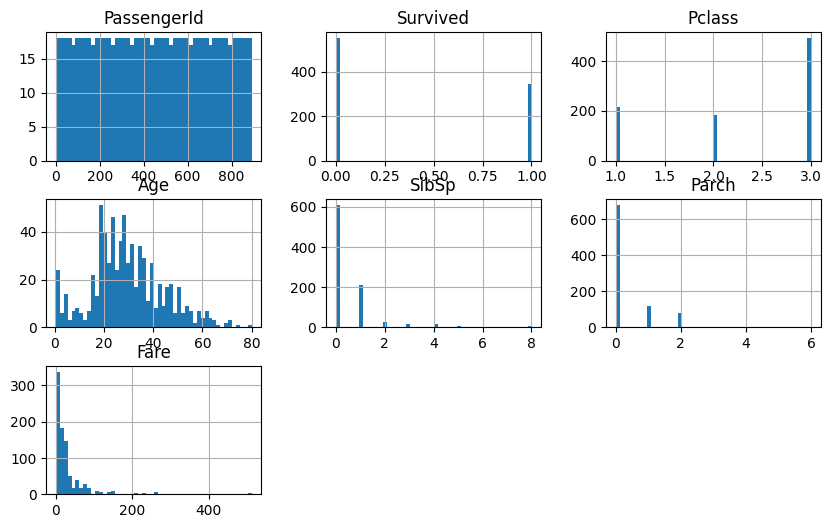

In [14]:
raw_data.hist(bins=50,figsize=(10,6))

In [12]:
sum(raw_data['Survived'])

342

In [13]:
raw_data[['Name','Age']]

,Name,Age
0,"Braund, Mr. Owen Harris",22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss. Laina",26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,"Allen, Mr. William Henry",35.0
...,...,...
886,"Montvila, Rev. Juozas",27.0
887,"Graham, Miss. Margaret Edith",19.0
888,"Johnston, Miss. Catherine Helen ""Carrie""",NaN
889,"Behr, Mr. Karl Howell",26.0


In [15]:
sum(raw_data['Survived'])

342

[38.70967742 59.80392157 65.         56.28742515 61.79775281 58.33333333
 68.42105263 85.71428571]


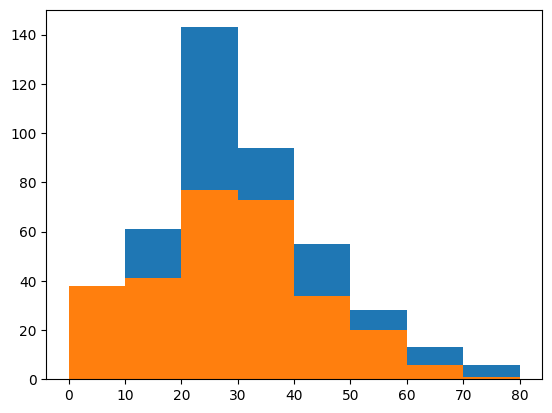

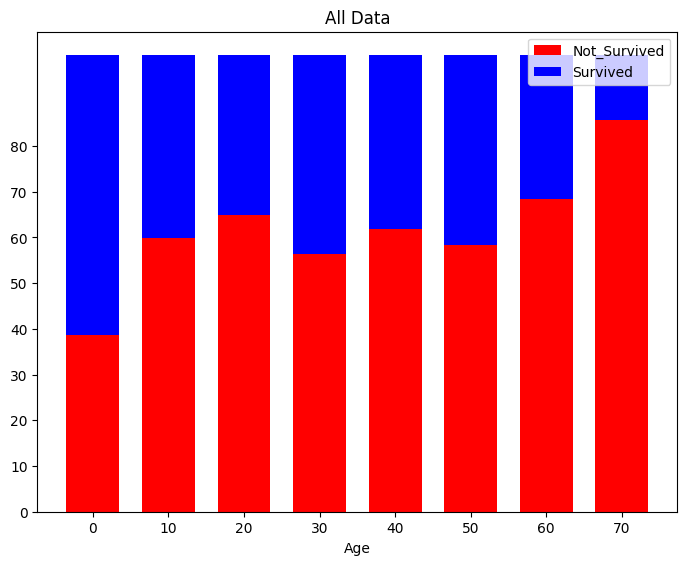

[36.66666667 24.44444444 27.77777778 16.66666667 31.25       11.11111111
  0.                 nan]


<ipython-input-16-3be20fdcc53c>:30: RuntimeWarning: invalid value encountered in divide
  stacked_data = 100*values /values.sum(axis=0)


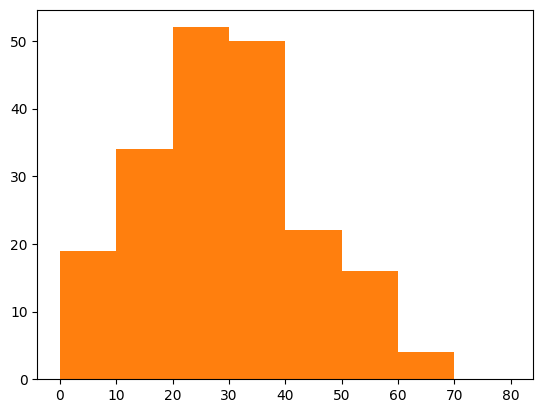

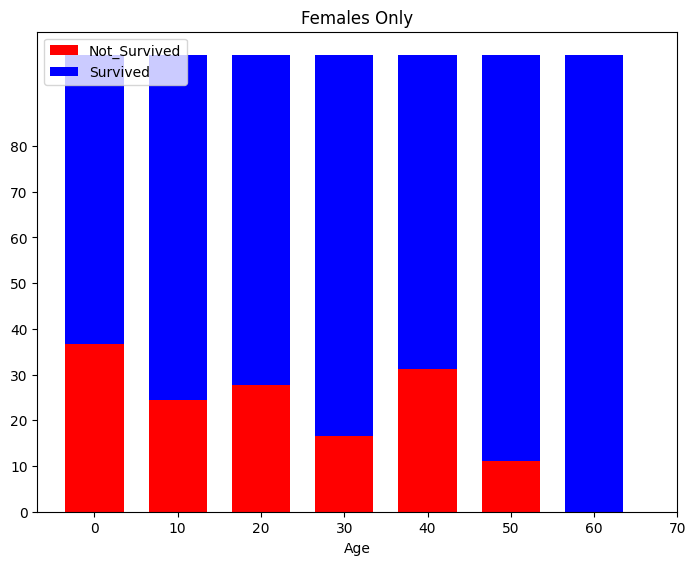

[40.625      87.71929825 83.10810811 78.5046729  78.94736842 86.66666667
 86.66666667 85.71428571]


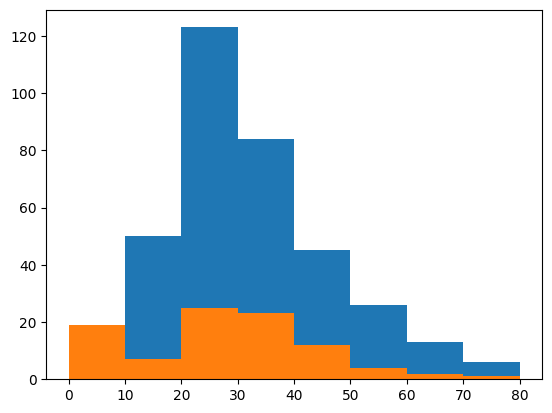

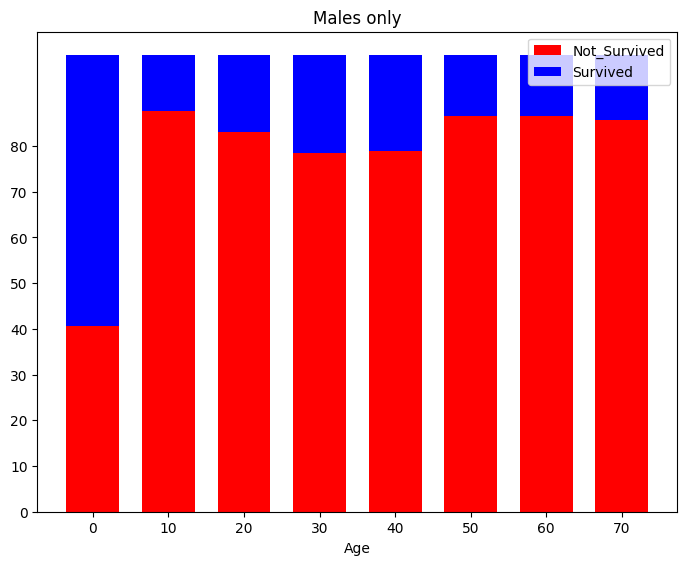

In [16]:
a=raw_data.where(raw_data["Survived"]==0)[["Age","Survived"]]
b=raw_data.where(raw_data["Survived"]==1)[["Age","Survived"]]
v1,b1,_=plt.hist(a["Age"],bins=[0,10, 20, 30, 40,50,60,70,80]);
v2,b2,_=plt.hist(b["Age"],bins=[0,10, 20, 30, 40,50,60,70,80]);
values=np.stack((v1,v2))
stacked_data = 100*values /values.sum(axis=0)

N=10
ind = np.arange(N)
width = 7
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
print(stacked_data[0,:])
ax.bar(b1[:-1], stacked_data[0,:], width, color='r')
ax.bar(b1[:-1], stacked_data[1,:], width,bottom=stacked_data[0,:], color='b')
ax.set_title('All Data')
ax.set_xlabel('Age')
ax.set_xticks(b1[:-1])
ax.set_yticks(np.arange(0, 81, 10))
ax.legend(labels=['Not_Survived', 'Survived'])
plt.show()


a=raw_data.loc[(raw_data["Survived"]==0) & (raw_data["Sex"]=="female"),["Age","Survived"]]
b=raw_data.loc[(raw_data["Survived"]==1) & (raw_data["Sex"]=="female"),["Age","Survived"]]
v1,b1,_=plt.hist(a["Age"],bins=[0,10, 20, 30, 40,50,60,70,80]);
v2,b2,_=plt.hist(b["Age"],bins=[0,10, 20, 30, 40,50,60,70,80]);
values=np.stack((v1,v2))
stacked_data = 100*values /values.sum(axis=0)

N=10
ind = np.arange(N)
width = 7
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
print(stacked_data[0,:])
ax.bar(b1[:-1], stacked_data[0,:], width, color='r')
ax.bar(b1[:-1], stacked_data[1,:], width,bottom=stacked_data[0,:], color='b')
ax.set_title('Females Only')
ax.set_xlabel('Age')
ax.set_xticks(b1[:-1])
ax.set_yticks(np.arange(0, 81, 10))
ax.legend(labels=['Not_Survived', 'Survived'])
plt.show()

a=raw_data.loc[(raw_data["Survived"]==0) & (raw_data["Sex"]=="male"),["Age","Survived"]]
b=raw_data.loc[(raw_data["Survived"]==1) & (raw_data["Sex"]=="male"),["Age","Survived"]]
v1,b1,_=plt.hist(a["Age"],bins=[0,10, 20, 30, 40,50,60,70,80]);
v2,b2,_=plt.hist(b["Age"],bins=[0,10, 20, 30, 40,50,60,70,80]);
values=np.stack((v1,v2))
stacked_data = 100*values /values.sum(axis=0)

N=10
ind = np.arange(N)
width = 7
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
print(stacked_data[0,:])
ax.bar(b1[:-1], stacked_data[0,:], width, color='r')
ax.bar(b1[:-1], stacked_data[1,:], width,bottom=stacked_data[0,:], color='b')
ax.set_title('Males only')
ax.set_xlabel('Age')
ax.set_xticks(b1[:-1])
ax.set_yticks(np.arange(0, 81, 10))
ax.legend(labels=['Not_Survived', 'Survived'])
plt.show()



## 12.2. Cleaning up the data

Now, let's look at how many columns have missing data

In [17]:
raw_data.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


The Cabin column is missing too many values to be useful. Let's drop it altogether.

In [18]:
clean_data = raw_data.drop('Cabin',axis=1)

In [19]:
clean_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


Other columns such as Age or Embarked are missing some values, but they can still be useful.

For the age column, let's fill in the missing values with the median of all ages.

For the Embarked column, let's make a new category called 'U', for Unknown port of embarkment.

In [20]:
median_age = raw_data['Age'].median()
median_age

28.0

In [21]:
clean_data["Age"] = clean_data["Age"].fillna(median_age)

In [22]:
clean_data["Embarked"] = clean_data["Embarked"].fillna('U')

In [23]:
clean_data.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [24]:
raw_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### 12.2.3 Saving our data for the future

In [27]:
clean_data.to_csv('./clean_titanic_data.csv',index=None)

## 12.3 Manipulating the features

- One-hot encoding
- Binning
- Feature selection

### 12.3.1 One-hot encoding

In [28]:
preprocessed_data = pd.read_csv('clean_titanic_data.csv')
preprocessed_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [29]:
preprocessed_data=pd.get_dummies(data=preprocessed_data,columns=['Embarked','Sex','Pclass'])

In [30]:
preprocessed_data

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Embarked_U,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,False,False,True,False,False,True,False,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,True,False,False,False,True,False,True,False,False
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,False,False,True,False,True,False,False,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,False,False,True,False,True,False,True,False,False
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,False,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,False,False,True,False,False,True,False,True,False
887,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,False,False,True,False,True,False,True,False,False
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,23.4500,False,False,True,False,True,False,False,False,True
889,890,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,True,False,False,False,False,True,True,False,False


### 12.3.2 Binning

In [31]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
categorized_age = pd.cut(preprocessed_data['Age'],bins)
preprocessed_data['Categorized_age'] = categorized_age
preprocessed_data = preprocessed_data.drop(["Age"], axis=1)
preprocessed_data=pd.get_dummies(data=preprocessed_data,columns=['Categorized_age'])
preprocessed_data

,PassengerId,Survived,Name,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,...,Pclass_2,Pclass_3,"Categorized_age_(0, 10]","Categorized_age_(10, 20]","Categorized_age_(20, 30]","Categorized_age_(30, 40]","Categorized_age_(40, 50]","Categorized_age_(50, 60]","Categorized_age_(60, 70]","Categorized_age_(70, 80]"
0,1,0,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.2500,False,False,True,...,False,True,False,False,True,False,False,False,False,False
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,71.2833,True,False,False,...,False,False,False,False,False,True,False,False,False,False
2,3,1,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,False,False,True,...,False,True,False,False,True,False,False,False,False,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.1000,False,False,True,...,False,False,False,False,False,True,False,False,False,False
4,5,0,"Allen, Mr. William Henry",0,0,373450,8.0500,False,False,True,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",0,0,211536,13.0000,False,False,True,...,True,False,False,False,True,False,False,False,False,False
887,888,1,"Graham, Miss. Margaret Edith",0,0,112053,30.0000,False,False,True,...,False,False,False,True,False,False,False,False,False,False
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",1,2,W./C. 6607,23.4500,False,False,True,...,False,True,False,False,True,False,False,False,False,False
889,890,1,"Behr, Mr. Karl Howell",0,0,111369,30.0000,True,False,False,...,False,False,False,False,True,False,False,False,False,False


### 12.3.4 Feature selection

In [32]:
preprocessed_data = preprocessed_data.drop(['Name', 'Ticket', 'PassengerId'], axis=1)
preprocessed_data.head()

,Survived,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Embarked_U,Sex_female,Sex_male,...,Pclass_2,Pclass_3,"Categorized_age_(0, 10]","Categorized_age_(10, 20]","Categorized_age_(20, 30]","Categorized_age_(30, 40]","Categorized_age_(40, 50]","Categorized_age_(50, 60]","Categorized_age_(60, 70]","Categorized_age_(70, 80]"
0,0,1,0,7.2500,False,False,True,False,False,True,...,False,True,False,False,True,False,False,False,False,False
1,1,1,0,71.2833,True,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
2,1,0,0,7.9250,False,False,True,False,True,False,...,False,True,False,False,True,False,False,False,False,False
3,1,1,0,53.1000,False,False,True,False,True,False,...,False,False,False,False,False,True,False,False,False,False
4,0,0,0,8.0500,False,False,True,False,False,True,...,False,True,False,False,False,True,False,False,False,False


### 12.3.5 Saving for future use

In [33]:
preprocessed_data.to_csv('./preprocessed_titanic_data.csv', index=None)

# 12.4 Training models

In [34]:
data = pd.read_csv('./preprocessed_titanic_data.csv')
data.head()

,Survived,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Embarked_U,Sex_female,Sex_male,...,Pclass_2,Pclass_3,"Categorized_age_(0, 10]","Categorized_age_(10, 20]","Categorized_age_(20, 30]","Categorized_age_(30, 40]","Categorized_age_(40, 50]","Categorized_age_(50, 60]","Categorized_age_(60, 70]","Categorized_age_(70, 80]"
0,0,1,0,7.2500,False,False,True,False,False,True,...,False,True,False,False,True,False,False,False,False,False
1,1,1,0,71.2833,True,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
2,1,0,0,7.9250,False,False,True,False,True,False,...,False,True,False,False,True,False,False,False,False,False
3,1,1,0,53.1000,False,False,True,False,True,False,...,False,False,False,False,False,True,False,False,False,False
4,0,0,0,8.0500,False,False,True,False,False,True,...,False,True,False,False,False,True,False,False,False,False


### 12.4.1 Features-labels split and train-validation split

In [35]:
features = data.drop(['Survived'],axis=1)
labels = data['Survived']

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
features_train, features_validation_test, labels_train, labels_validation_test = train_test_split(features,labels,test_size=0.4,random_state=100)

In [38]:
features_validation, features_test, labels_validation, labels_test = train_test_split(features_validation_test,labels_validation_test,test_size=0.5,random_state=100)

In [39]:
print(len(features_train))
print(len(features_validation))
print(len(features_test))
print(len(labels_train))
print(len(labels_validation))
print(len(labels_test))

534
178
179
534
178
179


### 12.4.2 Training different models on our dataset

We'll train six models:
- Logistic regression (perceptron)
- Decision tree
- Support vector machine (SVM)
- RandomForestClassifier
- GradientBoostingClassifier
- AdaBoostClassifier

In [52]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(features_train,labels_train)
lr_model.score(features_validation,labels_validation)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7696629213483146

In [53]:
from sklearn.tree import DecisionTreeClassifier
dt_model =DecisionTreeClassifier()
dt_model.fit(features_train,labels_train)
dt_model.score(features_validation,labels_validation)

0.7865168539325843

In [54]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(features_train,labels_train)
svm_model.score(features_validation,labels_validation)

0.6797752808988764

In [56]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(features_train,labels_train)
rf_model.score(features_validation,labels_validation)

0.7808988764044944

In [57]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model =GradientBoostingClassifier()
gb_model.fit(features_train,labels_train)
gb_model.score(features_validation,labels_validation)

0.8146067415730337

In [58]:
from sklearn.ensemble import AdaBoostClassifier
ab_model = AdaBoostClassifier()
ab_model.fit(features_train,labels_train)
ab_model.score(features_validation,labels_validation)

0.7359550561797753

### 12.4.3 Evaluating the models

#### Accuracy

In [59]:
print("Scores of the models :")
print(f"Logistic regression: {lr_model.score(features_validation,labels_validation)}")
print(f"Decision tree: {dt_model.score(features_validation,labels_validation)}")
print(f"SVM: {svm_model.score(features_validation,labels_validation)}")
print(f"Random forest: {rf_model.score(features_validation,labels_validation)}")
print(f"Gradient boosting: {gb_model.score(features_validation,labels_validation)}")
print(f"AdaBoost: {ab_model.score(features_validation,labels_validation)}")

Scores of the models :
Logistic regression: 0.7696629213483146
Decision tree: 0.7865168539325843
SVM: 0.6797752808988764
Random forest: 0.7808988764044944
Gradient boosting: 0.8146067415730337
AdaBoost: 0.7359550561797753


#### F1-score

In [65]:
# print F1-score of each model on validation data
from sklearn.metrics import f1_score
print("F1-scores of the models:")
lg_predict=lr_model.predict(features_validation)
print(f"Logistic regression: {f1_score(labels_validation,lg_predict)}")
dt_predict=dt_model.predict(features_validation)
print(f"Decision tree: {f1_score(labels_validation,dt_predict)}")
svm_predict=svm_model.predict(features_validation)
print(f"SVM: {f1_score(labels_validation,svm_predict)}")
rf_predict=rf_model.predict(features_validation)
print(f"Random forest: {f1_score(labels_validation,rf_predict)}")
gb_predict=gb_model.predict(features_validation)
print(f"Gradient boosting: {f1_score(labels_validation,gb_predict)}")
ab_predict=ab_model.predict(features_validation)
print(f"AdaBoost: {f1_score(labels_validation,ab_predict)}")

F1-scores of the models:
Logistic regression: 0.6870229007633588
Decision tree: 0.7164179104477612
SVM: 0.4
Random forest: 0.7111111111111111
Gradient boosting: 0.7441860465116279
AdaBoost: 0.6466165413533834


### 12.4.4 Testing the model

Finding the accuracy and the F1-score of the model in the testing set.

In [66]:
gb_model.score(features_test,labels_test)

0.8324022346368715

In [67]:
gb_predict2=gb_model.predict(features_test)
print(f"Gradient boosting: {f1_score(labels_test,gb_predict2)}")


Gradient boosting: 0.8026315789473685


# 12.5 Grid search

In [68]:
from sklearn.model_selection import GridSearchCV

In [71]:
svm_parameters = {'kernel': ['rbf'],
                  'C': [0.01, 0.1, 1 , 10, 100],
                  'gamma': [0.01, 0.1, 1, 10, 100]
                }
svm = SVC()
svm_gs = GridSearchCV(estimator=svm, param_grid=svm_parameters)
svm_gs.fit(features_train,labels_train)
svm_winner = svm_gs.best_estimator_
svm_winner

svm_winner.score(features_validation, labels_validation)

0.7191011235955056

In [ ]:
svm_winner

# 12.6 Cross validation

In [73]:
svm_gs.cv_results_

{'mean_fit_time': array([0.0156817 , 0.01692257, 0.01759429, 0.01973443, 0.02073345,
        0.01591163, 0.01716695, 0.01799378, 0.0202745 , 0.0194634 ,
        0.02000017, 0.02284288, 0.02118845, 0.0201921 , 0.03198266,
        0.02487502, 0.03352022, 0.0468565 , 0.03704472, 0.06917896,
        0.06080799, 0.03043299, 0.02105331, 0.02419758, 0.02252851]),
 'std_fit_time': array([0.00052565, 0.00176804, 0.00036963, 0.00127232, 0.00142508,
        0.0006551 , 0.00116085, 0.00039257, 0.00114985, 0.00017316,
        0.00807894, 0.00768315, 0.00188231, 0.00027394, 0.01031931,
        0.00927711, 0.0108041 , 0.00571279, 0.01143431, 0.02911923,
        0.04145459, 0.00442691, 0.00069124, 0.00200222, 0.00139662]),
 'mean_score_time': array([0.00766616, 0.00789347, 0.00852723, 0.00925412, 0.00909162,
        0.00753655, 0.00833306, 0.00817571, 0.0086729 , 0.01012278,
        0.00877075, 0.01050463, 0.00971923, 0.00847888, 0.01241412,
        0.00735316, 0.01498384, 0.01643138, 0.01359549, 0.03

# 12.7 Save the model

In [74]:
import joblib
joblib.dump(svm_gs,'my_model.pkl')

['my_model.pkl']